In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [4]:
data = pd.read_csv('./data/Titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 📚 척도의 종류(자료의 종류) 
### Measurement Scales

| 척도 구분    | 특징 | 예시 | 타이타닉 데이터 예시 |
|:------------|:----|:----|:----------------|
| **명목척도 (Nominal Scale)** | - 분류만 가능<br>- 서열 없음<br>- 수학적 연산 불가 | 성별, 지역, 혈액형, 선호도 등 | - 성별 (male, female)<br>- 승선 항구 (C, Q, S) |
| **순서척도 (Ordinal Scale)** | - 분류 가능 + 서열 있음<br>- 크기 차이는 불명확<br>- 덧셈, 뺄셈 불가 | 선호도(1순위, 2순위...), 학년, 고객 만족도 등 | - 선실 등급 (1st, 2nd, 3rd) |
| **구간척도 (Interval Scale)** | - 분류 가능 + 서열 있음 + 간격 의미 있음<br>- 하지만 절대 0이 없음<br>- 비율 계산 불가 | 온도(섭씨), 지수(지능지수 IQ 등) | (타이타닉에는 구간척도 예시는 특별히 없음)<br>- 가상의 예로 "탑승객 만족 점수 (0~100 점)" |
| **비율척도 (Ratio Scale)** | - 분류 가능 + 서열 있음 + 간격 의미 + 절대 0 존재<br>- 사칙연산 모두 가능 (비율 연산 가능) | 키, 몸무게, 나이, 수입, 점수 | - 나이 (Age)<br>- 운임 요금 (Fare)<br>- 형제/배우자 수 (SibSp), 부모/자식 수 (Parch) |

| 변수명  | 척도 종류 | 이유 |
|:-------|:---------|:-----|
| `Sex` (성별) | 명목척도 | 남자, 여자 구분만 가능. 남자가 여자보다 크다거나 작다는 개념 없음. |
| `Embarked` (승선항구) | 명목척도 | 탑승한 항구(C=쉘버그, Q=퀸스타운, S=사우샘프턴)는 단순 구분일 뿐, 크고 작음이 없음. |
| `Pclass` (선실 등급) | 순서척도 | 1등실 > 2등실 > 3등실 로 서열은 존재하지만, 1등실과 2등실 간 '차이'가 2등실과 3등실 간 '차이'와 같은지는 알 수 없음. |
| `Age` (나이) | 비율척도 | 0세가 절대적 기준, 나이의 비율 계산 가능 (20살은 10살의 2배). |
| `Fare` (운임) | 비율척도 | 0원이 절대적 기준, 100파운드는 50파운드의 2배. |
| `SibSp`, `Parch` (형제/배우자, 부모/자식 수) | 비율척도 | 0이 기준이고, 숫자 간 비율 의미 있음. |

# 이상값 탐지
* 이상값 : 데이터 집합에서 다른 값들과 뚜렷하게 다른 값
* 통계적으로 평균을 왜곡시킴, 모델의 결과를 왜곡시킬 수 있음
* 전체 데이터 분포에서 **정상 범위**에 속하지 않는 데이터

## 이상값 탐지 방법 3가지
1. z-score가 -3 ~ 3 범위를 넘어가는 경우
2. 평균을 기준으로 ±(3*표준편차)를 넘는 경우
    * 표준편차가 큰 경우에는 잘 못 잡음
3. IQR(사분위수) 기준으로 계산한 상위 하위 이상값을 넘는 경우
    * 정규·비정규분포에서 모두 강함

## 1. z-score로 이상값 탐지하기
* z-score : (값 - 평균) / 표준편차
* 평균 : .mean()
* 표준편차 : .std()

#### Fare 컬럼의 z-score 구하기

In [21]:
fare_z_score = (data['Fare'] - data['Fare'].mean()) / data['Fare'].std()
fare_z_score

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare, Length: 891, dtype: float64

In [24]:
data[
    ~fare_z_score.between(-3,3)
]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_z_score
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,4.644393
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,4.644393
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,4.332899
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,9.661740
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,4.332899
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4.631815
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,4.644393
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,3.608038
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,3.930516
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,4.644393


In [14]:
data['fare_z_score'] = data['Fare'].transform(lambda x: (x - x.mean()) / x.std())

In [20]:
data['fare_z_score']

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: fare_z_score, Length: 891, dtype: float64

In [25]:
outlier_zscore = data[
    ~data['fare_z_score'].between(-3,3)
]
outlier_zscore

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_z_score
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,4.644393
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,4.644393
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,4.332899
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,9.661740
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,4.332899
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4.631815
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,4.644393
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,3.608038
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,3.930516
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,4.644393


In [26]:
outlier_zscore.shape[0]

20

In [27]:
outlier_zscore['Fare'].min()

np.float64(211.3375)

### scipy.stats.zscore를 이용해서 zscore 계산하기

In [18]:
from scipy.stats import zscore

In [19]:
zscore(data['Fare'])

0     -0.502445
1      0.786845
2     -0.488854
3      0.420730
4     -0.486337
         ...   
886   -0.386671
887   -0.044381
888   -0.176263
889   -0.044381
890   -0.492378
Name: Fare, Length: 891, dtype: float64

## 2. ESD(Extreme Studentized Deviate)
* 평균과 표준편차를 이용해 이상값 찾기
* 평균 ±(3*표준편차) $ (\mu ± 3\sigma) $

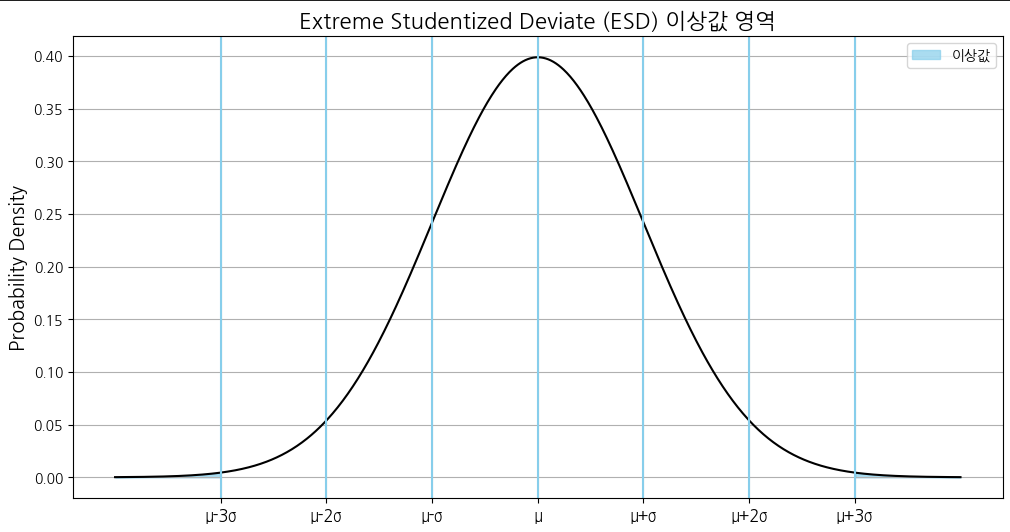

In [29]:
mean_fare = data['Fare'].mean()
std_fare = data['Fare'].std()
lower_bound = mean_fare - 3 * std_fare
upper_bound = mean_fare + 3 * std_fare

In [30]:
print('lower_bound', lower_bound, 'upper_bound', upper_bound)

lower_bound -116.87607782296804 upper_bound 181.2844937601173


In [34]:
outlier_esd = data[
    data['Fare'] > upper_bound
]
outlier_esd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_z_score
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,4.644393
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,4.644393
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,4.332899
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,9.661740
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,4.332899
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4.631815
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,4.644393
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,3.608038
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,3.930516
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,4.644393


In [35]:
outlier_esd.shape[0]

20

In [37]:
outlier_esd['Fare'].min()

np.float64(211.3375)

## 3. IQR(사분위수)를 이용한 이상값 탐지
### 1) IQR 이란?
* IQR은 데이터의 중간 50% 구간의 길이를 의미
* IQR은 0, 25, 50, 75, 100
* IQR = Q3(75%) - Q1(25%)
### 2) IQR로 이상값을 찾는 이유는?
* 평균과 표준편차는 극단적인 값에 민감
* IQR은 중간값 기반이라 극단값(outlier)의 영향을 덜 받음
* 정규분포가 아닌 데이터에서도 이상치를 잘 찾을 수 있음
### 3) IQR 기반 이상값 판정 기준
* 하한값 : Q1(25%) - (1.5 * IQR)
* 상한값 : Q3(75%) + (1.5 * IQR)

In [40]:
data[['Fare']].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


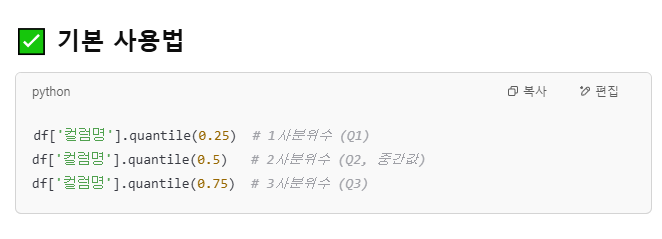

In [51]:
q1 = data['Fare'].quantile(0.25)
q3 = data['Fare'].quantile(0.75)
iqr = q3- q1

In [52]:
minimum = q1 - 1.5 * iqr
maximum = q3 + 1.5 * iqr

In [54]:
outlier_iqr = data[
    ~data['Fare'].between(minimum,maximum)
]
outlier_iqr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_z_score
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.786404
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,4.644393
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,2.300437
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,1.005497
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0.895994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,0.751524
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C,1.145020
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,2.669618
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,0.751524


## 상자수염그림(boxplot) 이용해서 이상값 탐지

<Axes: >

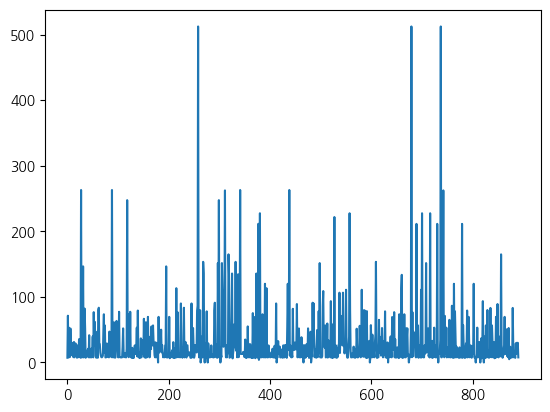

In [45]:
data['Fare'].plot()

<Axes: >

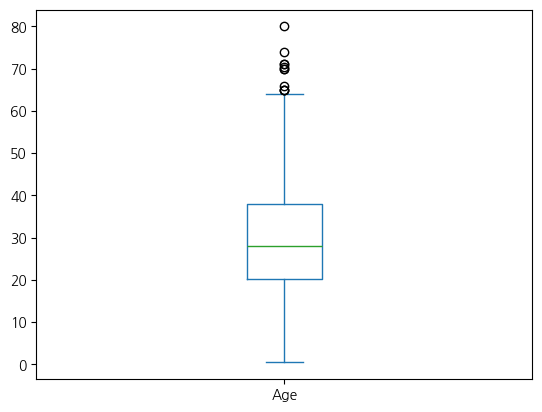

In [46]:
data['Age'].plot(kind='box')

<Axes: >

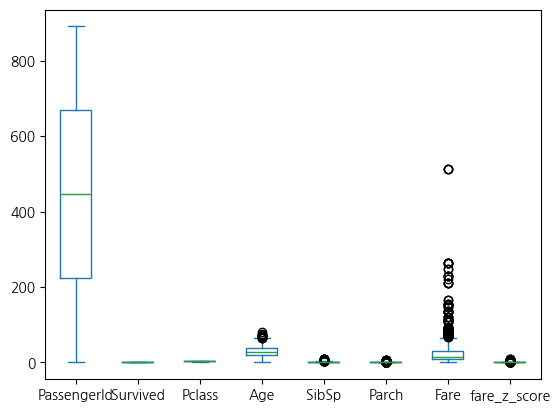

In [47]:
data.plot(kind='box')

### 도메인에 대한 이해가 필요하다
* 이상값이 있는 데이터인지 없는 데이터인지 판단이 필요하다 ex) 형제자매수, 나이

# 이상치 처리 방법 6가지
| 방법 | 설명 | 주의사항 |
|:----|:----|:----|
| 1. 삭제 (제거) | 이상치인 행(row) 삭제 | 데이터 수가 많을 때만 추천 |
| 2. 대체 (수정) | 평균, 중앙값 등으로 이상치 값을 대체 | 대체 값이 데이터의 특성을 망가뜨릴 수 있음 |
| 3. 변환 | 로그(log), 루트(sqrt) 변환해서 이상치 영향을 줄이기 | 주로 오른쪽으로 긴 분포(Skewed Data) |
| 4. 구간 압축 (Winsorization) | 상/하위 극단값을 일정 값으로 '컷' | 통계 왜곡 최소화할 때 사용 |
| 5. 모델링 시 Robust 방법 사용 | 이상치에 강한 모델 사용 (예: RobustScaler, RANSAC) | 이상치를 제거하지 않고 대응 |
| 6. 별도 분석 | 이상치만 따로 분석해서 인사이트 얻기 | 이상치가 중요한 의미를 가질 때 |

### 삭제, 대체보다는 별도 분석이 가장 먼저!!!

## winsorization으로 이상값을 정상범위 최대값으로 조정하기

In [57]:
iqr_idx = outlier_iqr.index
iqr_idx

Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
       ...
       792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
      dtype='int64', length=116)

In [60]:
data.loc[iqr_idx, 'Fare'] = maximum

## 좋은 방법은 아님!!!
* Fare는 Pclass에 의해서 정해지는 값이기 때문에 상관관계를 고려해서 이상값인지를 확인해야함

In [61]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,fare_z_score
count,891.000000,891.000000,891.000000,729.000000,891.000000,891.000000,891.000000,891.000000
mean,396.311549,8.840169,10.702122,34.784418,8.925466,8.841291,24.046813,8.293257
std,274.275473,21.989427,21.275253,18.812053,21.968002,21.996766,20.481625,22.198159
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,-0.648058
25%,117.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,-0.488874
50%,385.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,-0.357190
75%,635.500000,1.000000,3.000000,47.000000,1.000000,1.000000,31.000000,-0.024233
max,891.000000,65.634400,65.634400,80.000000,65.634400,65.634400,65.634400,65.634400
